# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

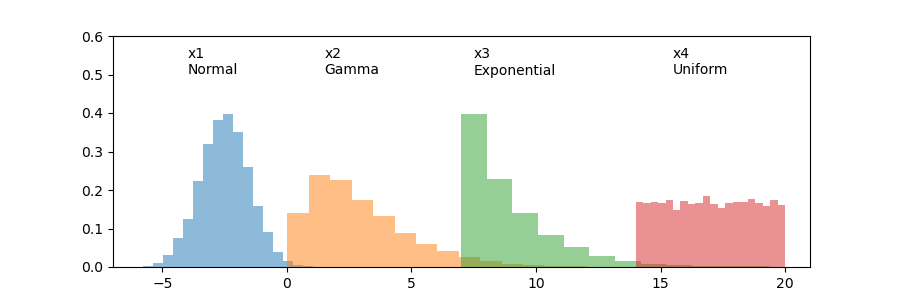

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform');

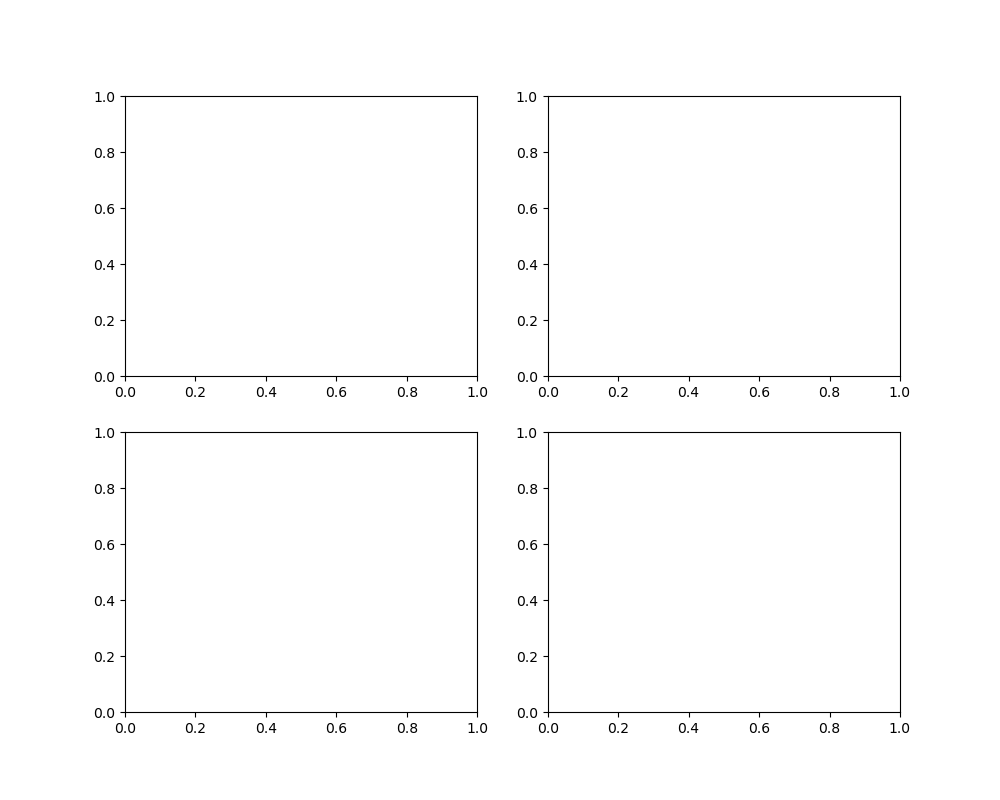

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

# Generate data
n = 1000
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n) + 7
x4 = np.random.uniform(14, 20, n)
x = [x1, x2, x3, x4]
x_start = [-7.5, 0, 7, 9.5]
texts = ['X1-Normal', 'X2-Gamma', 'X3-Exponential', 'X4-Uniform']
colors = ['b', 'orange', 'g', 'r']

# Create figure and axes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Pre-compute histogram bins
bins = np.linspace(-10, 25, 50)  # Increase the number of bins

def update(curr):
    # Stop the animation when the final frame is reached
    if curr == 1000:
        a.event_source.stop()

    for i, ax in enumerate(axs.flatten()):
        ax.cla()  # Clear the axes
        ax.hist(x[i][:curr], bins=bins, density=True, alpha=0.5, color=colors[i])
        ax.set_xlim(x_start[i], x_start[i] + 15)
        ax.set_ylim(0, 1)
        ax.text(x_start[i] + 9, 0.8, texts[i])
        ax.annotate(f'n = {curr}', xy=(x_start[i] + 5, 0.9))

    plt.tight_layout()

# Create the animation
frames = np.arange(100, 1001, 10)
a = animation.FuncAnimation(fig, update, frames=frames, interval=100, repeat=False)

# Show the plot
plt.show()

a.save('animation.gif', writer='pillow')

Dropdown(description='Distribution', options=('Normal\ndistribution', 'Gamma\ndistribution', 'Exponential\ndis…

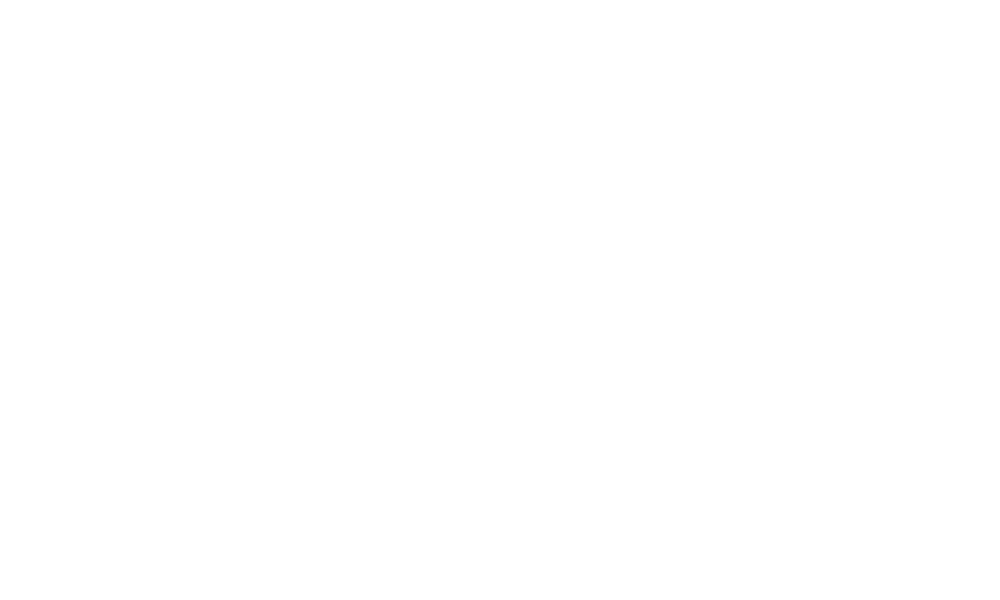

In [10]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
# from ipywidgets import interact
import ipywidgets as widgets
# generate 4 random variables from the random, gamma, exponential, and uniform distributions

x1 = np.random.normal(-2.5, 1, 100)
x2 = np.random.gamma(2, 1.5, 100)
x3 = np.random.exponential(2, 100)+7
x4 = np.random.uniform(14,20, 100)

distribution_names=['Normal\ndistribution','Gamma\ndistribution','Exponential\ndistribution','Uniform\ndistribution']
n = 100

fig= plt.figure(figsize=(10,6))

dropdown= widgets.Dropdown(
    options=distribution_names,
    value='Normal\ndistribution',
    description='Distribution'
)

button=widgets.Button(
    description='Start Animation'
)
def update(curr,distribution):
    # if curr == n: 
    #     a.event_source.stop()
    plt.cla()

    plt.gca().set_title('Sampling Distribution', size=15)
    plt.gca().set_ylabel('Frequency', size=15)
    
    if distribution=='Normal\ndistribution':
        bins = np.arange(-5, 2, 0.5)
        plt.hist(x1[:curr],bins=bins,color='#f15bb5')
        plt.gca().set_xlabel('Normal Distribution', size=15)
        plt.axis([-5,2,0,25])
        plt.annotate('n = {}'.format(curr), [1,22], color='#ef233c')
        
    elif distribution=='Gamma\ndistribution':
        bins = np.arange(0,10, 0.5)
        plt.hist(x2[:curr],bins=bins,color='#fee440')
        plt.gca().set_xlabel('Gamma\ndistribution', size=15)
        plt.axis([0,10,0,25])
        plt.annotate('n = {}'.format(curr), [9,22], color='#ef233c')
        
    elif distribution=='Exponential\ndistribution':
        bins = np.arange(0,15, 0.5)
        plt.hist(x3[:curr],bins=bins,color='#00bbf9')
        plt.gca().set_xlabel('Exponential\ndistribution', size=15)
        plt.axis([0,15,0,25])
        plt.annotate('n = {}'.format(curr), [13,22], color='#ef233c')
        
    elif distribution=='Uniform\ndistribution':
        bins = np.arange(14,21, 0.5)
        plt.hist(x4[:curr],bins=bins,color='#00f5d4')
        plt.gca().set_xlabel('Uniform\ndistribution', size=15)
        plt.axis([13,21,0,25])
        plt.annotate('n = {}'.format(curr), [20,22], color='#ef233c')
        

def animate(curr):
    update(curr,dropdown.value)
    if curr==n:
        a.event_source.stop()
    
a = animation.FuncAnimation(fig,animate,frames=n+1, interval=100,repeat=False)

def on_dropdown_change(change):
    
    update(0,change['new'])
    a.event_source.start()
    # update(slider.value,change['new'])
    
dropdown.observe(on_dropdown_change,names='value')
        
# play.observe(restart_animation, names ='value')
display(dropdown)
plt.show()   